# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST 데이터 불러오기

In [1]:
# 모듈 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 패션 MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# SGD Classifier 사용을 위한 정규화 + 2차원 배열 -> 3차원 배열 변경
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

# train 데이터 -> train, val 데이터 분류
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
# 신경망 모델 생성
model = keras.Sequential()

In [3]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [4]:
# 맥스풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

# 맥스풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 신경망 밀집층(은닉층 + 출력층) 추가 + DropOut
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
# 신경망 층 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [22]:
import pydot
import graphviz
import pydotplus

keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
# 신경망 층 그림 정보 출력
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## 모델 컴파일과 훈련

In [11]:
# 손실함수, 측정 지표 설정(Optimizer : ADAM)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# Callback - 에포크마다 모델 저장 + 결론적으로, 가장 낮은 검증 점수 만드는 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)

# Callback - 검증 점수 2회 연속 상승 시 조기 종료 + 결론적으로, 가장 낮은 검증 점수 만드는 파라미터만 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 모델 훈련(검증 데이터 전달 + 콜백 지정) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5118 - accuracy: 0.8167 - val_loss: 0.3236 - val_accuracy: 0.8821
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3385 - accuracy: 0.8784 - val_loss: 0.2909 - val_accuracy: 0.8935
Epoch 3/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2936 - accuracy: 0.8947 - val_loss: 0.2678 - val_accuracy: 0.9001
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2594 - accuracy: 0.9054 - val_loss: 0.2528 - val_accuracy: 0.9055
Epoch 5/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2372 - accuracy: 0.9126 - val_loss: 0.2445 - val_accuracy: 0.9093
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2175 - accuracy: 0.9202 - val_loss: 0.2337 - val_accuracy: 0.9139
Epoch 7/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2000 - accuracy: 0.9260 - val_loss: 0.2146 -

In [12]:
# 모듈 불러오기
import matplotlib.pyplot as plt

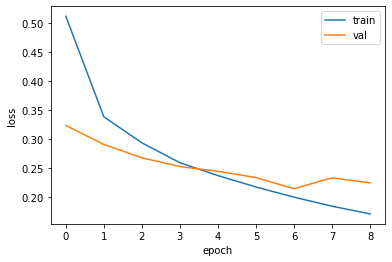

In [13]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [14]:
# 모델 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2146 - accuracy: 0.9221


[0.21455131471157074, 0.92208331823349]

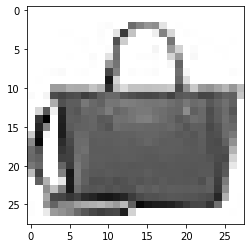

In [15]:
# 확인용 코드 - 일부 데이터 이미지 출력
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

plt.show()

In [16]:
# 모델 예측 - 일부 데이터
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.3499814e-13 2.1021575e-18 3.3617271e-13 8.5354002e-15 2.3350015e-12
  5.3486729e-13 1.4018930e-12 3.2973594e-13 1.0000000e+00 1.1415660e-14]]


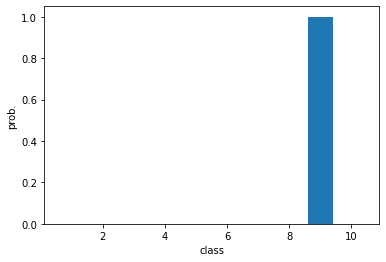

In [17]:
# 모델 예측 시각화
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')

plt.show()

In [18]:
# 패션 MNIST 데이터셋 레이블 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
# 모듈 불러오기
import numpy as np

# 확인용 코드 - 모델 예측 레이블 확인
print(classes[np.argmax(preds)])

가방


In [20]:
# SGD Classifier 사용을 위한 정규화 + 2차원 배열 -> 3차원 배열 변경
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
# 모델 성능 평가
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.9131


[0.24574540555477142, 0.913100004196167]